<a href="https://colab.research.google.com/github/montblanc-1981/data-analysis-basic-kadai/blob/main/pca/kadai_20231107.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

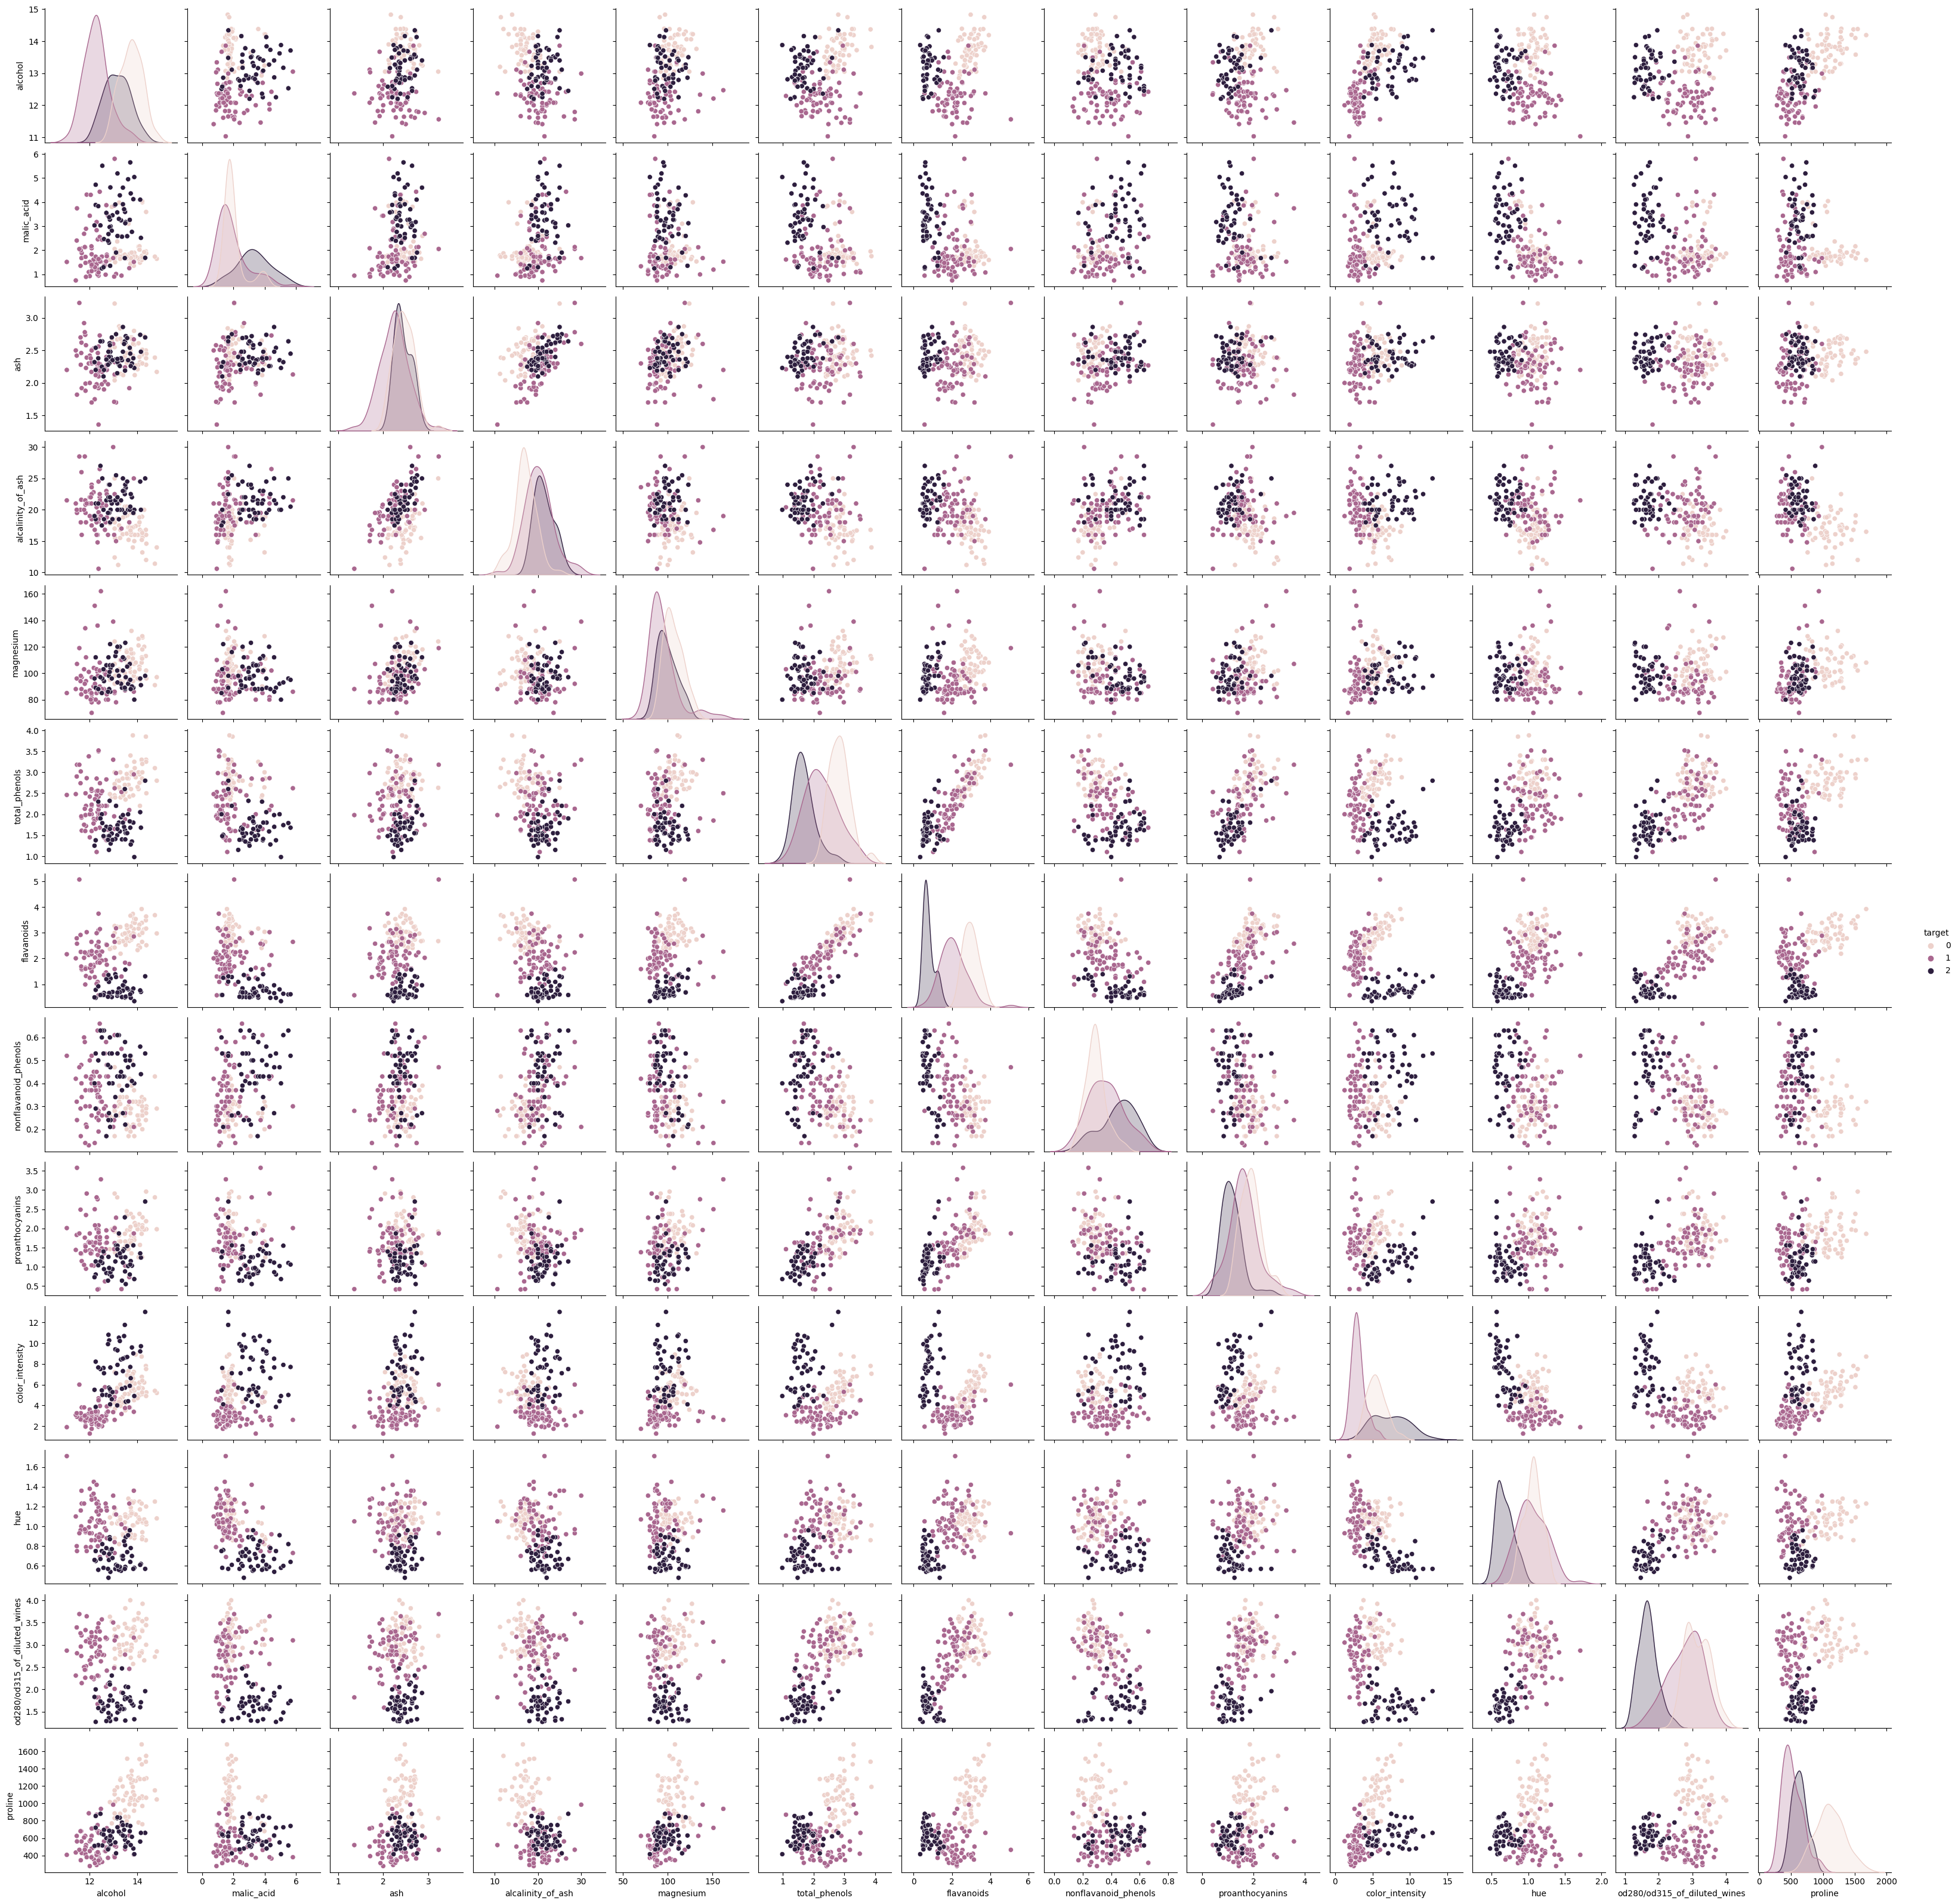

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine

wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine['target']
df.groupby('target').describe()

sns.pairplot(df, hue='target')



In [ ]:
scaler = StandardScaler()
X = df.to_numpy()
scaler.fit(X)

X_scaled = scaler.transform(X)



In [ ]:
pca = PCA(n_components=3)
pca_row = pca.fit_transform(X_scaled)



In [ ]:
pca_col = ["PC{}".format(x + 1) for x in range(len(X_scaled.columns))]
df_con_ratio = pd.DataFrame([pca.explained_variance_ratio_], columns = pca_col)
print(df_con_ratio.head())

AttributeError: ignored

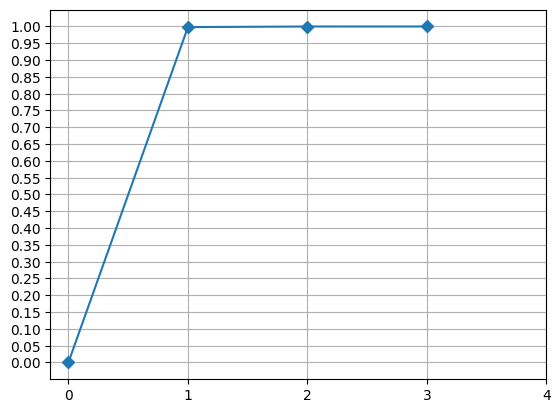

In [ ]:
cum_con_ratio = np.hstack([0, pca.explained_variance_ratio_]).cumsum()
plt.plot(cum_con_ratio, 'D-')
plt.xticks(range(5))
plt.yticks(np.arange(0,1.05,0.05))
plt.grid()
plt.show()